Fraud detection is a highly imbalanced classification problem where false negatives are significantly more costly than false positives.
This EDA explores transaction-level patterns to understand fraud behavior before model development.

1. Business Context
2. Data Loading & Merge
3. Target Variable Analysis
4. Transaction Amount Analysis
5. Time-Based Fraud Patterns
6. Missing Value Analysis
7. Feature Correlation with Fraud
8. Key EDA Takeaways


In [1]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", 200)
sns.set(style="whitegrid")


In [4]:
DATA_PATH = "C:\\Users\\ozdil\\Downloads\\fraud\\ieee-fraud-detection\\"

train_txn = pd.read_csv(DATA_PATH + "train_transaction.csv")
train_id = pd.read_csv(DATA_PATH + "train_identity.csv")

df = train_txn.merge(train_id, on="TransactionID", how="left")

print(df.shape)
df.head()


(590540, 434)


,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,...,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0,T,T,T,M2,F,T,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,M0,T,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,debit,330.0,87.0,287.0,NaN,outlook.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,315.0,NaN,NaN,NaN,315.0,T,T,T,M0,F,F,F,F,F,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,debit,476.0,87.0,NaN,NaN,yahoo.com,NaN,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0,112.0,112.0,0.0,94.0,0.0,NaN,NaN,NaN,NaN,84.0,NaN,NaN,NaN,NaN,111.0,NaN,NaN,NaN,M0,T,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,28.0,0.0,0.0,0.0,0.0,10.0,0.0,4.0,0.0,0.0,1.0,1.0,1.0,1.0,38.0,24.0,0.0,0.0,0.0,0.0,0.0,

In [5]:
df_sample = df.sample(frac=0.2, random_state=42)


In [6]:
fraud_rate = df_sample["isFraud"].mean()
print(f"Fraud Rate: {fraud_rate:.4%}")


Fraud Rate: 3.5916%


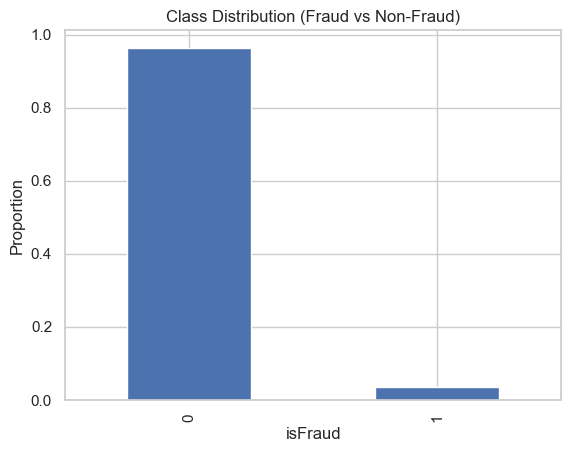

In [7]:
plt.figure()
df_sample["isFraud"].value_counts(normalize=True).plot(kind="bar")
plt.title("Class Distribution (Fraud vs Non-Fraud)")
plt.ylabel("Proportion")
plt.xlabel("isFraud")
plt.show()


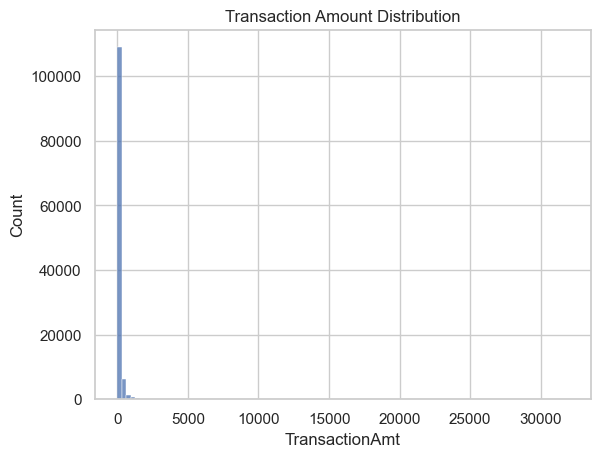

In [8]:
plt.figure()
sns.histplot(df_sample["TransactionAmt"], bins=100)
plt.title("Transaction Amount Distribution")
plt.show()


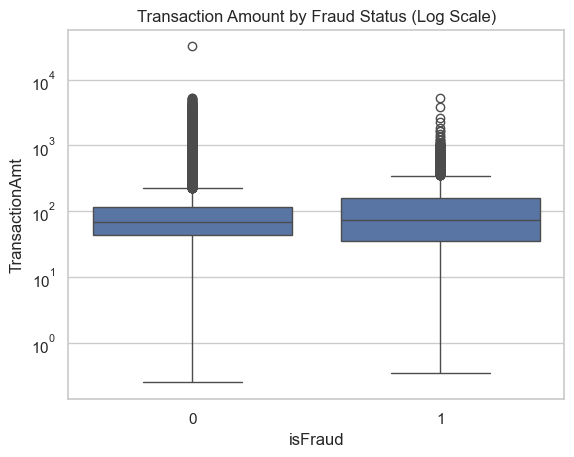

In [9]:
plt.figure()
sns.boxplot(x="isFraud", y="TransactionAmt", data=df_sample)
plt.yscale("log")
plt.title("Transaction Amount by Fraud Status (Log Scale)")
plt.show()


In [10]:
df_sample = df_sample.assign(
    TransactionHour=(df["TransactionDT"] / 3600) % 24,
    TransactionDay=df["TransactionDT"] // (3600 * 24)
)


C:\Users\ozdil\AppData\Local\Temp\ipykernel_13508\1149269201.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_sample = df_sample.assign(


In [11]:
df_sample["isFraud"].value_counts(dropna=False)


isFraud
0    113866
1      4242
Name: count, dtype: int64

In [12]:
df_sample["isFraud"] = df_sample["isFraud"].astype(int)
df_sample["TransactionHour"] = df_sample["TransactionHour"].astype(int)


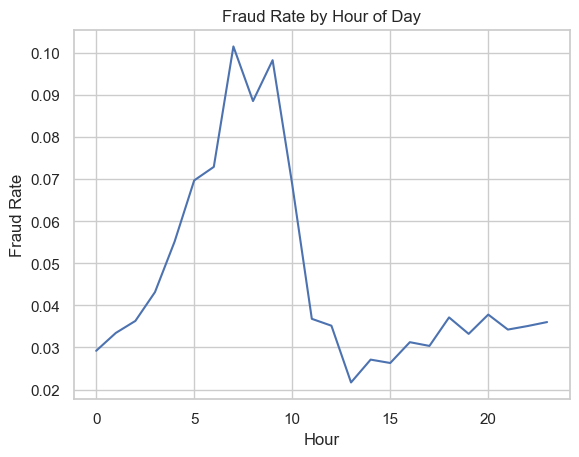

In [13]:
hourly_fraud = df_sample.groupby("TransactionHour")["isFraud"].mean()

plt.figure()
hourly_fraud.plot()
plt.title("Fraud Rate by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Fraud Rate")
plt.show()


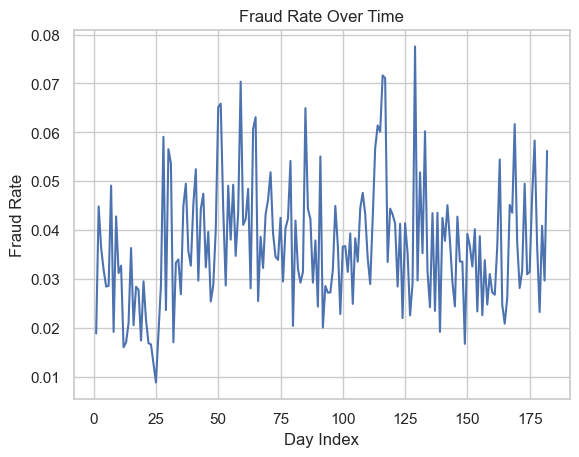

In [14]:
daily_fraud = df_sample.groupby("TransactionDay")["isFraud"].mean()

plt.figure()
daily_fraud.plot()
plt.title("Fraud Rate Over Time")
plt.xlabel("Day Index")
plt.ylabel("Fraud Rate")
plt.show()


In [15]:
missing_pct = df_sample.isnull().mean().sort_values(ascending=False)

missing_pct.head(20)


id_24    0.992075
id_25    0.991381
id_21    0.991355
id_08    0.991355
id_07    0.991355
id_22    0.991330
id_23    0.991330
id_27    0.991330
id_26    0.991330
dist2    0.936897
D7       0.934120
id_18    0.923739
D13      0.896222
D14      0.894867
D12      0.891464
id_03    0.886858
id_04    0.886858
D6       0.876918
id_33    0.875064
D9       0.872066
dtype: float64

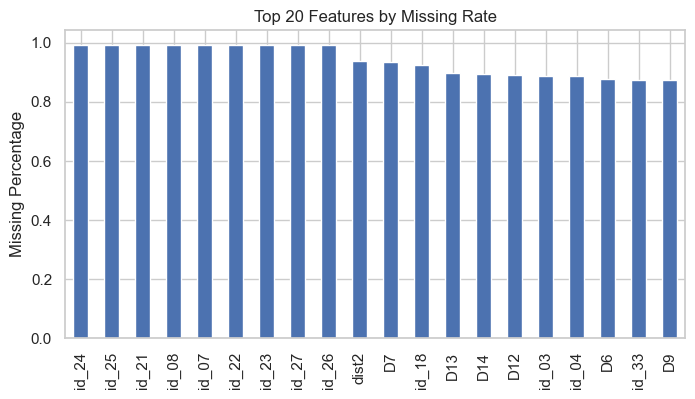

In [16]:
plt.figure(figsize=(8, 4))
missing_pct.head(20).plot(kind="bar")
plt.title("Top 20 Features by Missing Rate")
plt.ylabel("Missing Percentage")
plt.show()


In [17]:
missing_fraud = (
    df.isnull()
    .groupby(df_sample["isFraud"])
    .mean()
    .T
)

missing_fraud["diff"] = missing_fraud[1] - missing_fraud[0]
missing_fraud.sort_values("diff", ascending=False).head(15)


isFraud,0.0,1.0,diff
M6,0.274805,0.589816,0.315011
addr2,0.099696,0.380481,0.280785
addr1,0.099696,0.380481,0.280785
M1,0.450371,0.706506,0.256135
M2,0.450371,0.706506,0.256135
M3,0.450371,0.706506,0.256135
V8,0.464195,0.719000,0.254806
V9,0.464195,0.719000,0.254806
V10,0.464195,0.719000,0.254806
V7,0.464195,0.719000,0.254806


In [18]:
import numpy as np

numeric_cols = df.select_dtypes(include=[np.number]).columns

corr = (
    df_sample[numeric_cols]
    .corr()["isFraud"]
    .sort_values(ascending=False)
)

corr.head(15)


: 

: 

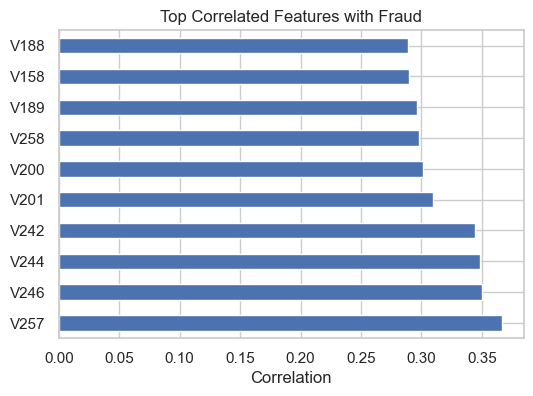

In [ ]:
plt.figure(figsize=(6, 4))
corr.drop("isFraud").head(10).plot(kind="barh")
plt.title("Top Correlated Features with Fraud")
plt.xlabel("Correlation")
plt.show()
